### Linning up my Strategy to Solve this Challenge:

1. Understand the problem by knowing your data
2. Univariate data analysis.
3. Multivariate data analysis.
4. Check for missing data.
5. Finding the outliers in the data.
6. Checking Skewness in the data.
7. Convert Categorical data items into numerical data items.
8. Scaling the data
9. Training Models on this data.

### Step 1: Understand the problem by knowing the data.
This Step involves having a look at the shape of the data, the content of the data, different type of datatypes present in the data. Also gathering some knowledge about problem by studies articles, blogs, researches on  market trends about this problem.

In [311]:
#importing useful libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.linear_model import Ridge
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [312]:
ScoreData= pd.read_csv('Math_Students_Data_Challenge.csv')

In [313]:
ScoreData.columns.values

array(['State', 'Avg_Math_Score', 'Avg_English_Score', 'Total_Enrollment',
       'State_Debt', 'State_Revenue', 'Salaries', 'Emp_Benefits',
       'Student_Support', 'Inst_Staff_Support'], dtype=object)

In [314]:
ScoreData.shape

(51, 10)

In [315]:
ScoreData.head()

,State,Avg_Math_Score,Avg_English_Score,Total_Enrollment,State_Debt,State_Revenue,Salaries,Emp_Benefits,Student_Support,Inst_Staff_Support
0,Alabama,269.1943,257.4278,744548,5116627,3898347,5045,1884,502,400
1,Alaska,281.5596,261.2561,131091,1321403,1707449,8151,6110,1497,1260
2,Arizona,279.7223,260.4483,941726,4270089,2934165,4446,1265,567,410
3,Arkansas,277.9148,261.9645,477716,3664741,3847045,5639,1556,484,798
4,California,275.9014,261.5025,6208733,54627921,35141208,5567,2085,492,515


In [316]:
ScoreData.dtypes

State                  object
Avg_Math_Score        float64
Avg_English_Score     float64
Total_Enrollment        int64
State_Debt              int64
State_Revenue           int64
Salaries                int64
Emp_Benefits            int64
Student_Support         int64
Inst_Staff_Support      int64
dtype: object

In [317]:
# Getting a statistical picture of the data items in terms of count, mean, standard deviation, distribution of values
ScoreData.describe()

,Avg_Math_Score,Avg_English_Score,Total_Enrollment,State_Debt,State_Revenue,Salaries,Emp_Benefits,Student_Support,Inst_Staff_Support
count,51.000000,51.000000,5.100000e+01,5.100000e+01,5.100000e+01,51.000000,51.000000,51.000000,51.000000
mean,283.915004,266.299490,9.470535e+05,8.141933e+06,5.368678e+06,6486.019608,2545.745098,673.254902,515.941176
std,7.230598,6.004292,1.133659e+06,1.279279e+07,6.187873e+06,1547.671147,1084.222428,345.795480,190.090548
min,265.259400,247.739200,4.417900e+04,0.000000e+00,0.000000e+00,3528.000000,953.000000,230.000000,243.000000
25%,279.773450,261.948000,2.771900e+05,1.313020e+06,1.835186e+06,5353.500000,1734.500000,448.500000,408.000000
50%,284.897600,267.215000,6.714450e+05,4.270089e+06,3.693829e+06,6156.000000,2282.000000,551.000000,492.000000
75%,288.738500,270.133050,1.026836e+06,8.848232e+06,6.975934e+06,7272.500000,3155.500000,790.000000,552.500000
max,300.568200,277.009600,6.208733e+06,6.795766e+07,3.514121e+07,10385.000000,6110.000000,1843.000000,1260.000000


In [318]:
# Numerical Features
num_feat=ScoreData.select_dtypes(exclude=['object']).columns
print(num_feat)

Index(['Avg_Math_Score', 'Avg_English_Score', 'Total_Enrollment', 'State_Debt',
       'State_Revenue', 'Salaries', 'Emp_Benefits', 'Student_Support',
       'Inst_Staff_Support'],
      dtype='object')


In [319]:
# Categorical Features
cat_feat=ScoreData.select_dtypes(include=['object']).columns
print(cat_feat)

Index(['State'], dtype='object')


### Step 2: Univariate data analysis. ####

In [320]:
# For the variable Saleprice, understanding its values using different statistical terms like
# mean, count, standard deviation
ScoreData['Avg_Math_Score'].describe()

count     51.000000
mean     283.915004
std        7.230598
min      265.259400
25%      279.773450
50%      284.897600
75%      288.738500
max      300.568200
Name: Avg_Math_Score, dtype: float64

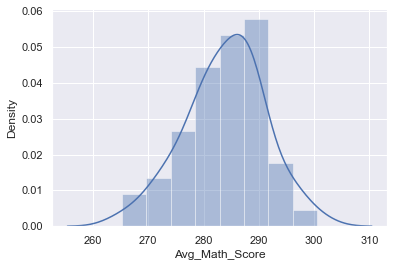

In [321]:
#plotting a histogram to check how the different values of saleprice are distributed
sns.distplot(ScoreData['Avg_Math_Score']);

Observations drawn looking at the Histogram
* Deviate from the normal distribution.
* Have some negative skewness.
* Show peakedness.

In [322]:
#skewness and kurtosis
print("Skewness: %f" % ScoreData['Avg_Math_Score'].skew())
print("Kurtosis: %f" % ScoreData['Avg_Math_Score'].kurt())

Skewness: -0.262241
Kurtosis: 0.171323


### 3. Bivariate Data Analysis

#### Analysing all Against Avg Math Score (target)

#### Part 1: For Numerical Features

In [323]:
# Filtering out the numerical features in a different data frame
ScoreData_num=ScoreData[num_feat]
ScoreData_num.head(5)

,Avg_Math_Score,Avg_English_Score,Total_Enrollment,State_Debt,State_Revenue,Salaries,Emp_Benefits,Student_Support,Inst_Staff_Support
0,269.1943,257.4278,744548,5116627,3898347,5045,1884,502,400
1,281.5596,261.2561,131091,1321403,1707449,8151,6110,1497,1260
2,279.7223,260.4483,941726,4270089,2934165,4446,1265,567,410
3,277.9148,261.9645,477716,3664741,3847045,5639,1556,484,798
4,275.9014,261.5025,6208733,54627921,35141208,5567,2085,492,515


#### Correlation:  Finding How closely one variable relate with another i.e. How strongly the value of the variable increase or decrease with change in value of another variable

In [324]:
# Checking the variables absolute correlation with Avg_Math_Score
df_corr=ScoreData_num.corr()['Avg_Math_Score'][:-1]
high_corr_feat=df_corr.sort_values(ascending=False)
print("There is {} strongly correlated value with SalePrice:\n{}".format(len(high_corr_feat), high_corr_feat))

There is 8 strongly correlated value with SalePrice:
Avg_Math_Score       1.000000
Avg_English_Score    0.889285
Salaries             0.602606
Student_Support      0.341295
Emp_Benefits         0.270238
State_Debt           0.026528
State_Revenue        0.008343
Total_Enrollment    -0.034391
Name: Avg_Math_Score, dtype: float64


#### As Avg_Math_Score value is almost independent of values of  State_Debt, State_Revenue, Total_enrollment, they might be excluded from analysis for prediction house prices, but let's look further before making any haste

#### Plotting all Numerical Columns against Sale Price to get a more clear picture

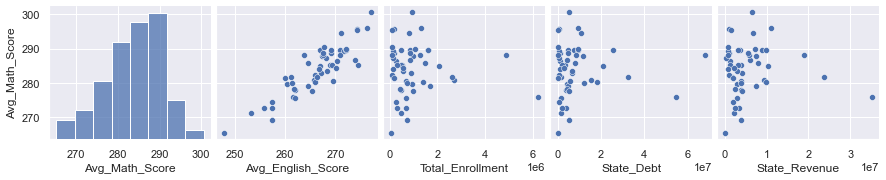

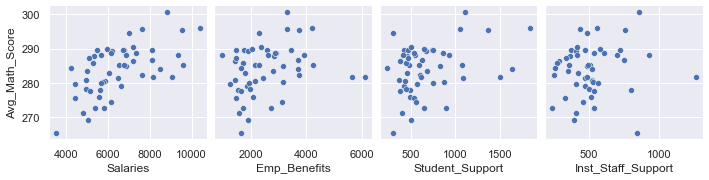

In [325]:
for i in range(0, len(ScoreData_num.columns), 5):
    sns.pairplot(data=ScoreData_num,
                x_vars=ScoreData_num.columns[i:i+5],
                y_vars=['Avg_Math_Score'])

#### Looking at scatter plots
##### I find 'that in first position 'Salaries' is most positively correlated to Avg_Math_Score
##### I find that in second position 'Student_Support' is positively correlated to Avg_Math_Score
##### I find that is third position 'Emp_Benefits' is  less positively correlated to Avg_Math_Score
##### I find that is fourth position 'Inst_Staff_Support' is very less positively correlated to Avg_Math_Score
##### But State_Debt, State_Revenue, Total_enrollment still do not show any relation and are still eligible to be dropped but let's do further analysis

### Part 2: For Categorical Features

In [326]:
# Getting list of different categories which each categorical feature belong too
for catg in list(cat_feat) :
    print(ScoreData[catg].value_counts())
    print('#'*50)

Vermont                 1
Pennsylvania            1
Wyoming                 1
Louisiana               1
Kentucky                1
Iowa                    1
New Mexico              1
North Dakota            1
Alaska                  1
Minnesota               1
Arizona                 1
South Dakota            1
Hawaii                  1
California              1
New Hampshire           1
Virginia                1
Illinois                1
Oregon                  1
Tennessee               1
Arkansas                1
Kansas                  1
North Carolina          1
Washington              1
District of Columbia    1
Maryland                1
Maine                   1
Missouri                1
Colorado                1
Georgia                 1
South Carolina          1
Massachusetts           1
Alabama                 1
Montana                 1
Connecticut             1
Utah                    1
Indiana                 1
Oklahoma                1
Nebraska                1
West Virgini

#### Plotting Box Plots which are Generally Good Visual representation to Observe how categorical values are distributed

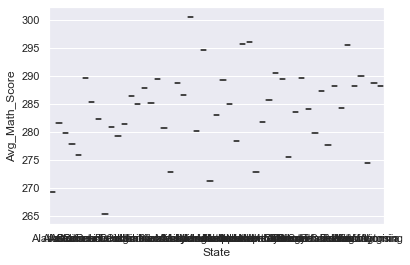

In [327]:
plt.show()
sns.boxplot(x='State', y='Avg_Math_Score', data=ScoreData)
sns.set(rc={"figure.figsize":(20, 5)})


### Step 4: Multivariate Data Analysis

#### This Step involves learning relationships between every pair of variable in the dataset

#### Best place to start with is to draw a Correlation Matrix (heatmap) filtering pairs which have high absolute correlation

<AxesSubplot:>

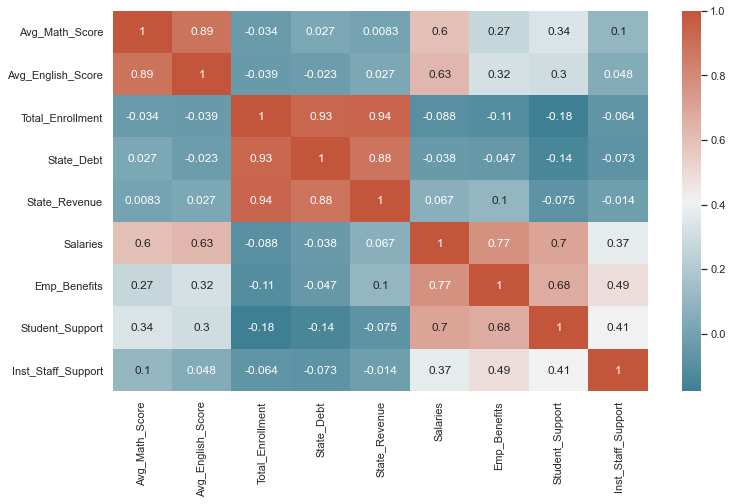

In [328]:
# plot the heatmap
corr = ScoreData.corr()
plt.figure(figsize=(12,7))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

In [329]:
c = corr
s = c.unstack()
so = s.sort_values(kind="quicksort")
so.tail(40)

Avg_Math_Score      Emp_Benefits          0.270238
Student_Support     Avg_English_Score     0.304263
Avg_English_Score   Student_Support       0.304263
Emp_Benefits        Avg_English_Score     0.315011
Avg_English_Score   Emp_Benefits          0.315011
Student_Support     Avg_Math_Score        0.341295
Avg_Math_Score      Student_Support       0.341295
Inst_Staff_Support  Salaries              0.374505
Salaries            Inst_Staff_Support    0.374505
Inst_Staff_Support  Student_Support       0.413900
Student_Support     Inst_Staff_Support    0.413900
Emp_Benefits        Inst_Staff_Support    0.488021
Inst_Staff_Support  Emp_Benefits          0.488021
Avg_Math_Score      Salaries              0.602606
Salaries            Avg_Math_Score        0.602606
                    Avg_English_Score     0.627317
Avg_English_Score   Salaries              0.627317
Student_Support     Emp_Benefits          0.675914
Emp_Benefits        Student_Support       0.675914
Student_Support     Salaries   

###### State_Debt is Highly Positively Correlated with Total_Enrollment
###### State_Revenue is Highly Positively Correlated with Total_Enrollment
###### Total_Enrollment,State_Dept and State_Revenue are weakly correlated to Avg_Math_Score.
######  Therefore two of the above three variable can be dropped

###### Employy_Benefits is Highly Positively Correlated with Salary
###### Salaries is Highly Positively Correlated with Student_Support


<AxesSubplot:>

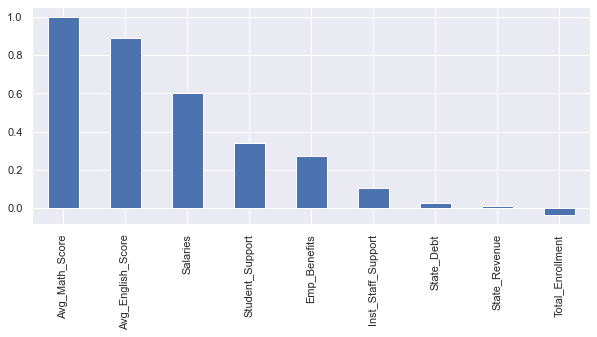

In [330]:
plt.figure(figsize=(10,4))
ScoreData.corr()['Avg_Math_Score'].sort_values(ascending = False).plot(kind='bar')

 #### Therefore Marked for Dropping are:
#### State Revenue, State Depth


### Step 5: Missing Data Analysis

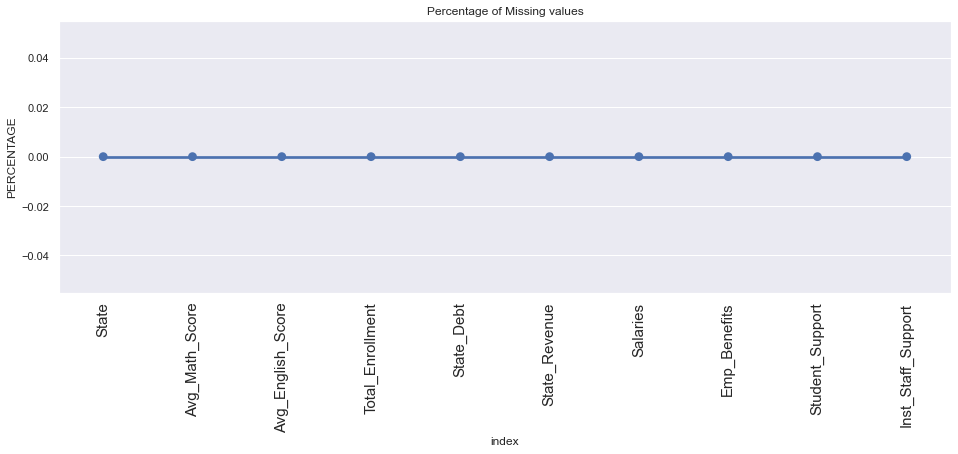

In [331]:
missing = pd.DataFrame((ScoreData.isnull().sum())*100/ScoreData.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize =15)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

#### Good News, No missing data found

### Step 7:  Finding Skewness in Data


We will draw boxplot - Kurtosis and skewness. Normal probability plot - Data distribution should closely follow the diagonal that represents the normal distribution.

In [332]:
from scipy.stats import skew,boxcox_normmax
from scipy.special import boxcox1p
ScoreData_num = ScoreData_num.select_dtypes(include=['int64','float64'])
skew_features = ScoreData_num.apply(lambda x: skew(x)).sort_values(ascending=False)
high_skew = skew_features[skew_features > 0.5]
skew_index = high_skew.index
skewness = pd.DataFrame({'Skew' :high_skew})
skew_features

State_Debt            3.179995
Total_Enrollment      2.932110
State_Revenue         2.911816
Student_Support       1.588270
Inst_Staff_Support    1.506453
Emp_Benefits          1.201072
Salaries              0.597752
Avg_Math_Score       -0.254464
Avg_English_Score    -0.713735
dtype: float64

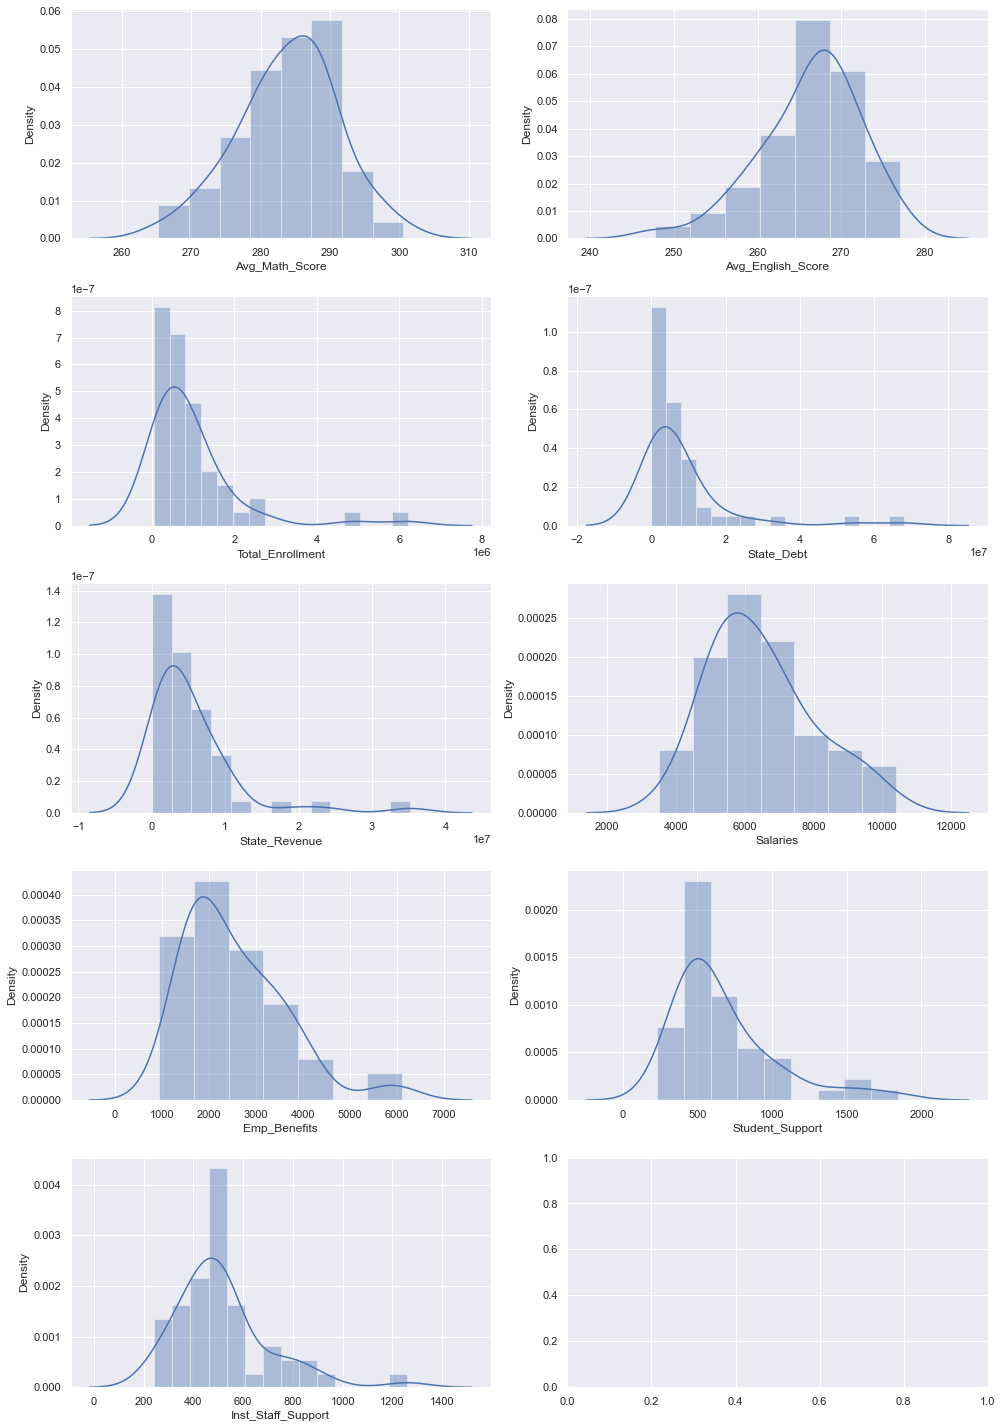

In [333]:
num_feat=ScoreData.select_dtypes(exclude=['object']).columns
li_num_feats = list(ScoreData_num)
nr_rows = 5
nr_cols = 2

ScoreData_copy=ScoreData.copy()

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*7,nr_rows*4))
for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(li_num_feats):
            sns.distplot(ScoreData[li_num_feats[i]],ax = axs[r][c]);
plt.tight_layout()    
plt.show()

In [334]:
# Normalize skewed features using a Box-Cox power transformation, we can use other techniques but am using boxpox
# as it works very well on this dataset
for i in skew_index:
    ScoreData[i] = boxcox1p(ScoreData[i], boxcox_normmax(ScoreData[i] + 1.002))

In [335]:
ScoreData_num = ScoreData_num.select_dtypes(include=['int64','float64'])
skew_features = ScoreData_num.apply(lambda x: skew(x)).sort_values(ascending=False)
high_skew = skew_features[skew_features > 0.5]
skew_index = high_skew.index
skewness = pd.DataFrame({'Skew' :high_skew})
skew_features

State_Debt            3.179995
Total_Enrollment      2.932110
State_Revenue         2.911816
Student_Support       1.588270
Inst_Staff_Support    1.506453
Emp_Benefits          1.201072
Salaries              0.597752
Avg_Math_Score       -0.254464
Avg_English_Score    -0.713735
dtype: float64

#### Rechecking if skewness is fixed

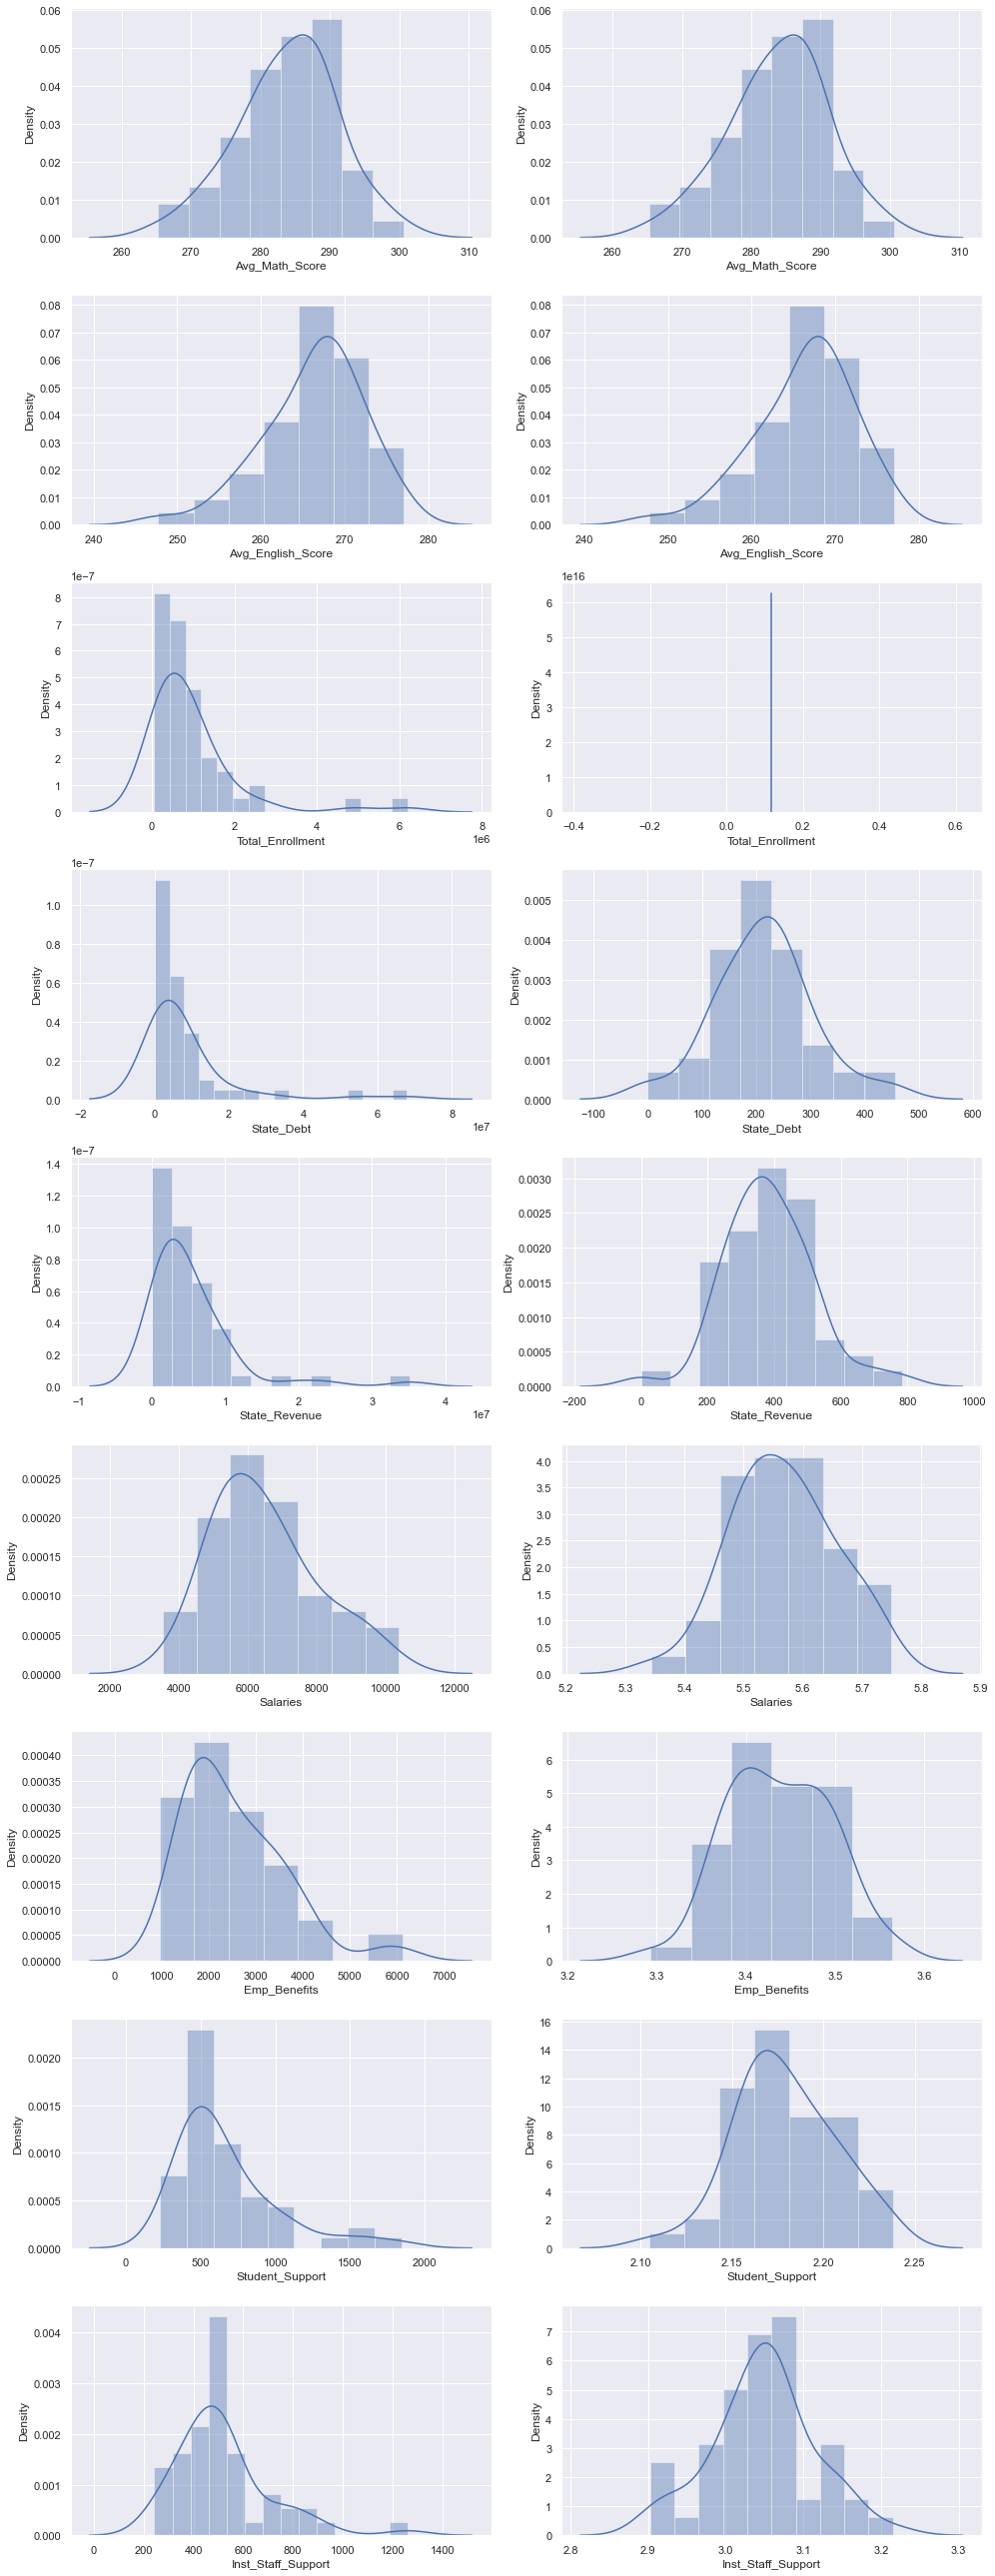

In [336]:
li_num_feats = list(num_feat)
nr_rows = 9
nr_cols = 2

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*7,nr_rows*4))
for r in range(0,nr_rows): 
        i = r
        if i < len(li_num_feats):
            sns.distplot(ScoreData_copy[li_num_feats[i]],ax = axs[r][0]);
            sns.distplot(ScoreData[li_num_feats[i]],ax = axs[r][1]);
plt.tight_layout()    
plt.show()

### Step 8: Converting Categorical Values into Numerical Values

In [337]:
df_all_num= ScoreData.select_dtypes(include=['float64','int64']).columns  # Numerical columns
df_all_cat = ScoreData.select_dtypes(exclude=['float64','int64']) # selecting object and categorical features only
df_all_dummy= pd.get_dummies(df_all_cat)
ScoreData=pd.concat([ScoreData,df_all_dummy],axis=1) # joining converted dummy feature and original df_all dataset
ScoreData= ScoreData.drop(df_all_cat.columns,axis=1) #removing original categorical columns
ScoreData.shape

(51, 60)

In [338]:
ScoreData.head(5)

,Avg_Math_Score,Avg_English_Score,Total_Enrollment,State_Debt,State_Revenue,Salaries,Emp_Benefits,Student_Support,Inst_Staff_Support,State_Alabama,...,State_South Dakota,State_Tennessee,State_Texas,State_Utah,State_Vermont,State_Virginia,State_Washington,State_West Virginia,State_Wisconsin,State_Wyoming
0,269.1943,257.4278,0.118034,226.935309,388.006101,5.484007,3.407241,2.168983,3.011707,1,...,0,0,0,0,0,0,0,0,0,0
1,281.5596,261.2561,0.118034,157.033716,297.745091,5.663044,3.563890,2.229378,3.215283,0,...,0,0,0,0,0,0,0,0,0,0
2,279.7223,260.4483,0.118034,216.074065,354.235678,5.435212,3.342977,2.177190,3.016762,0,...,0,0,0,0,0,0,0,0,0,0
3,277.9148,261.9645,0.118034,207.293125,386.362894,5.526410,3.377171,2.166437,3.141485,0,...,0,0,0,0,0,0,0,0,0,0
4,275.9014,261.5025,0.118034,430.013994,783.555385,5.521542,3.422608,2.167585,3.061930,0,...,0,0,0,0,0,0,0,0,0,0


### Step 9: Scaling the Data

In [339]:

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
ScoreData_sc = sc.fit_transform(ScoreData)


In [340]:
ScoreData.head(5)

,Avg_Math_Score,Avg_English_Score,Total_Enrollment,State_Debt,State_Revenue,Salaries,Emp_Benefits,Student_Support,Inst_Staff_Support,State_Alabama,...,State_South Dakota,State_Tennessee,State_Texas,State_Utah,State_Vermont,State_Virginia,State_Washington,State_West Virginia,State_Wisconsin,State_Wyoming
0,269.1943,257.4278,0.118034,226.935309,388.006101,5.484007,3.407241,2.168983,3.011707,1,...,0,0,0,0,0,0,0,0,0,0
1,281.5596,261.2561,0.118034,157.033716,297.745091,5.663044,3.563890,2.229378,3.215283,0,...,0,0,0,0,0,0,0,0,0,0
2,279.7223,260.4483,0.118034,216.074065,354.235678,5.435212,3.342977,2.177190,3.016762,0,...,0,0,0,0,0,0,0,0,0,0
3,277.9148,261.9645,0.118034,207.293125,386.362894,5.526410,3.377171,2.166437,3.141485,0,...,0,0,0,0,0,0,0,0,0,0
4,275.9014,261.5025,0.118034,430.013994,783.555385,5.521542,3.422608,2.167585,3.061930,0,...,0,0,0,0,0,0,0,0,0,0


### Step 10: Training Models on this data.

#### We will test simple sklearn models and compare by metrics
#### We test the following Regressors from scikit-learn:
#### LinearRegression


In [341]:
y=ScoreData['Avg_Math_Score']
x=ScoreData.drop(['Avg_Math_Score','Avg_English_Score'],axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
model = LinearRegression().fit(x_train, y_train) 
r_sq = model.score(x_train, y_train)
print('coefficient of determination training:', r_sq)
r_sq = model.score(x_test, y_test)
print('coefficient of determination testing:', r_sq)

coefficient of determination training: 1.0
coefficient of determination testing: -0.07755520757453449


In [342]:
coeff_df = pd.DataFrame(model.coef_, x.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Total_Enrollment,-0.170770
State_Debt,0.011005
State_Revenue,-0.010249
Salaries,7.606103
Emp_Benefits,1.517856
Student_Support,0.823267
Inst_Staff_Support,1.817843
State_Alabama,-15.091717
State_Alaska,-4.901563
State_Arizona,-4.337565


#### Model is getting Overfit
#### Dropping some Redundant Columns we earlier marked for deletion can trying to fit model again

In [378]:
y=ScoreData['Avg_Math_Score']
x=ScoreData[['Salaries','Emp_Benefits','Student_Support','Inst_Staff_Support']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.27, random_state=42)
model = LinearRegression().fit(x_train, y_train) 
r_sq = model.score(x_train, y_train)
print('coefficient of determination during training:', r_sq)
r_sq = model.score(x_test, y_test)
print('coefficient of determination during testing:', r_sq)
y_pred=model.predict(x_test)
print('Mean Absolute error during testing:',mean_absolute_error(y_test, y_pred))

coefficient of determination during training: 0.4025648056104084
coefficient of determination during testing: 0.43462324599957924
Mean Absolute error during testing: 5.005719973499936


In [379]:
coeff_df = pd.DataFrame(model.coef_, x.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Salaries,83.043883
Emp_Benefits,-53.155303
Student_Support,-20.328592
Inst_Staff_Support,-11.215740


#### Due to less data this might not be good fit, but as per this, the linear regression equation will be

#### Avg_Math_Score = 83(Salaries) -53(Emp_Benefits) -20(Student_Support)-11(Inst_Staff_Support)


#### Interpreting Permutation Importances The values towards the top are the most important features, and those towards the bottom matter least.

#### The first number in each row shows how much model performance decreased with a random shuffling (in this case, using "accuracy" as the performance metric).

#### Like most things in data science, there is some randomness to the exact performance change from a shuffling a column. We measure the amount of randomness in our permutation importance calculation by repeating the process with multiple shuffles. The number after the ± measures how performance varied from one-reshuffling to the next.

#### You'll occasionally see negative values for permutation importances. In those cases, the predictions on the shuffled (or noisy) data happened to be more accurate than the real data. This happens when the feature didn't matter (should have had an importance close to 0), but random chance caused the predictions on shuffled data to be more accurate. This is more common with small datasets, like the one in this example, because there is more room for luck/chance.

#### In our example, the most important feature was Salaries. That seems sensible

In [380]:
perm = PermutationImportance(model, random_state=1).fit(x_train, y_train)
eli5.show_weights(perm, feature_names = x_train.columns.tolist())

Weight,Feature
1.8590 ± 0.8542,Salaries
0.3873 ± 0.2155,Emp_Benefits
0.0346 ± 0.0420,Inst_Staff_Support
0.0180 ± 0.0239,Student_Support


In [381]:
model = Ridge(alpha=1e-2).fit(x_train, y_train)
model.score(x_test, y_test)

perm = PermutationImportance(model, random_state=1).fit(x_train, y_train)
eli5.show_weights(perm, feature_names = x_train.columns.tolist())

Weight,Feature
1.3267 ± 0.6398,Salaries
0.2076 ± 0.1325,Emp_Benefits
0.0278 ± 0.0332,Inst_Staff_Support
0.0103 ± 0.0166,Student_Support


#### According to the concept of permutation Feature the following is order of imponce of feature
1. Salaries
2. Emp_Benefits
3. Inst_Staff_Support
4. Student_Support

#### Finding Feature Importance by adding Feature one by one and Checking r2 score

In [382]:
initial_r_sq=0
def linearregrun(x,y) :
    global initial_r_sq
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    model = LinearRegression().fit(x_train, y_train) 
    r_sq = model.score(x_train, y_train)
    print('coefficient of determination during training:', r_sq)
    r_sq = model.score(x_test, y_test)
    print('coefficient of determination during testing:', r_sq)
    y_pred=model.predict(x_test)
    print('Mean Absolute error during testing:',mean_absolute_error(y_test, y_pred))
    if initial_r_sq!=0:
      print('Percentage Improvement in r2 square ',(r_sq-initial_r_sq)*100/initial_r_sq)
    initial_r_sq=r_sq

#### Using Only Inst_Staff_Support

In [383]:
y=ScoreData['Avg_Math_Score']
x=ScoreData[['Inst_Staff_Support']]
linearregrun(x,y)

coefficient of determination during training: 0.006627860444701872
coefficient of determination during testing: -0.016407464472375954
Mean Absolute error during testing: 5.797814639019603


#### Using Only Inst_Staff_Support and Emp_Benefits

In [384]:
y=ScoreData['Avg_Math_Score']
x=ScoreData[['Inst_Staff_Support','Emp_Benefits']]
linearregrun(x,y)

coefficient of determination during training: 0.09332896800014145
coefficient of determination during testing: -0.003961804123792545
Mean Absolute error during testing: 6.0084224583251595
Percentage Improvement in r2 square  -75.85364801208166


In [385]:
y=ScoreData['Avg_Math_Score']
x=ScoreData[['Inst_Staff_Support','Emp_Benefits','Student_Support']]
linearregrun(x,y)

coefficient of determination during training: 0.11475761164340914
coefficient of determination during testing: 0.011073088839129164
Mean Absolute error during testing: 5.909161721995986
Percentage Improvement in r2 square  -379.496120785728


In [386]:
y=ScoreData['Avg_Math_Score']
x=ScoreData[['Inst_Staff_Support','Emp_Benefits','Student_Support','Salaries']]
linearregrun(x,y)

coefficient of determination during training: 0.46461423428855964
coefficient of determination during testing: 0.27270492811177816
Mean Absolute error during testing: 4.823957267797926
Percentage Improvement in r2 square  2362.771969715587


In [387]:
y=ScoreData['Avg_Math_Score']
x=ScoreData[['Inst_Staff_Support','Emp_Benefits','Student_Support','Salaries','Total_Enrollment']]
linearregrun(x,y)

coefficient of determination during training: 0.4646142342885611
coefficient of determination during testing: 0.27270492811177804
Mean Absolute error during testing: 4.823957267797916
Percentage Improvement in r2 square  -4.071151307431052e-14


In [388]:
y=ScoreData['Avg_Math_Score']
x=ScoreData[['Inst_Staff_Support','Emp_Benefits','Student_Support','Salaries','State_Debt']]
linearregrun(x,y)

coefficient of determination during training: 0.47619189473874457
coefficient of determination during testing: 0.23494984354169723
Mean Absolute error during testing: 5.096402360341312
Percentage Improvement in r2 square  -13.844665306013654


In [354]:
y=ScoreData['Avg_Math_Score']
x=ScoreData[['Inst_Staff_Support','Emp_Benefits','Student_Support','Salaries','State_Revenue']]
linearregrun(x,y)

coefficient of determination during training: 0.46570490543070786
coefficient of determination during testing: 0.2666569509848099
Mean Absolute error during testing: 4.830097775028445
Percentage Improvement in r2 square  13.495266464174307


In [355]:
ScoreData['Total_Benefit']=ScoreData['Emp_Benefits']+ScoreData['Salaries']

In [389]:
y=ScoreData['Avg_Math_Score']
x=ScoreData[['Inst_Staff_Support','Student_Support','Total_Benefit']]
linearregrun(x,y)

coefficient of determination during training: 0.30722784609259013
coefficient of determination during testing: 0.17115263778109346
Mean Absolute error during testing: 4.838842276518836
Percentage Improvement in r2 square  -27.15354255993854


### Using Different Methods of relating 'Inst_Staff_Support','Emp_Benefits','Student_Support','Salaries' to Avg_Math_Score, I observed that:
#### 1) Salaries is highest positively Correlared to  Avg_Math_Score which means increase in salaries increase the Avg_Math_Score most.

#### 2) When Tried to create a equation relating all 4 budget sections to the Avg_Math_Score, using linear regression fit, I arrived at equation
#####  Avg_Math_Score = 83(Salaries) -53(Emp_Benefits) -20(Student_Support)-11(Inst_Staff_Support)
#### This equation also says increasing salary will increase Avg Math score the most while increase in other variables as per this equation won't necessarily increase salary.

#### 3) Using the concept of Permutation Importance, when we tried to put random shuffled variable in place of each column and checked if output is affected, the output was effected most by Salaries establishing the importance of salaries.

#### 4) Method of estimating importance of features by adding features one by one and checking if r2 score increases also shows an improvement of 2000% when salary column gets added in feature slit.

#### Therefore, An increase in Salaries is most likely to cause highest increase in the average Math score of the students, therefore If I am given 1000 dollars, I will invest that in salaries